<a href="https://colab.research.google.com/github/sakurasakura1996/Pytorch-start-learning/blob/master/Dive_into_DL_Pytorch_3_1%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1线性回归
线性回归输出是一个连续值，因此适用于回归问题。回归问题实际中很常见。分类问题中模型的最终输出是一个离散值。softmax回归则适用于分类问题。
由于线性回归和softmax回归都是单层神经网络，所以以此为例介绍大多数深度学习模型的基本要素和表示方法

## 3.1.1 线性回归基本要素
以房价预测为例，我们简单的认为房价取决于面积和房屋年龄两个因素，即特征。
### 3.1.1.1 模型定义   字太多了，pdf还复制不了，这里就不敲了
    y = w1*x1 + w2*x2 + b    -->模型
### 3.1.1.2 模型训练
    训练数据（找到最适合的参数）
    损失函数（衡量预测值和真实值之间的误差，使之越小越好）
    优化算法
### 3.1.1.3 模型预测
## 3.1.2 线性回归的表示方法


In [0]:
# 3.2 线性回归的从零开始实现
%matplotlib inline   
# 嵌入显示
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display

 

In [0]:
# 3.2.1 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels = true_w[0]*features[:,0] + true_w[1]*features[:,1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))


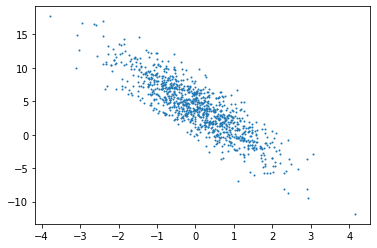

In [3]:
# 通过生成第二个特征features[:,1] 和标签labels的散点图，可以更直观观察两者间的线性关系
def use_svg_display():
  # 用矢量图显示
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
  use_svg_display()
  # 设置图的尺寸
  plt.rcParams['figure.figsize'] =  figsize

# 貌似上面的并没卵用啊
# set_figsize()
fig = plt.figure()
plt.scatter(features[:,1].numpy(), labels.numpy(),1)
plt.show()

In [0]:
# 3.2.2 读取数据
# 训练模型时，我们需要遍历数据集并不断读取小批量的数据样本。这里定义一个函数：他每次返回batch_size个随机样本的特征和标签啦
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)  # 样本读取顺序是随机的
  for i in range(0, num_examples, batch_size):
    j = torch.LongTensor(indices[i:min(i+batch_size, num_examples)])   # 最后一次可能不足一个batch
    yield features.index_select(0, j), labels.index_select(0, j)

In [13]:
# 3.2.3 初始化模型参数
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)),dtype=torch.float64)
b = torch.zeros(1,dtype=torch.float64)

# 之后的迭代中，我们需要对这些参数求梯度来迭代参数的值
w.requires_grad_(requires_grad=True)    # In-place方式
b.requires_grad_(requires_grad=True)


tensor([0.], dtype=torch.float64, requires_grad=True)

In [0]:
# 3.2.4 定义模型
# 下面是线性回归的矢量计算表达式的实现。使用mm做矩阵乘法
def linreg(X, w, b):
  return torch.mm(X,w)+b

In [0]:
# 3.2.5 定义损失函数
def squared_loss(y_hat,y):
  return (y_hat - y.view(y_hat.size())) ** 2 / 2


In [0]:
# 3.2.6 定义优化算法
# 实现的是小批量随机梯度下降算法 这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和。我们将它除以批量大小来得到平均值
def sgd(params, lr, batch_size):
  for param in params:
    param.data -= lr * param.grad / batch_size   # 注意这里更改param时用的是param.data 也就是我之前那个不懂的地方所在

In [16]:
# 3.2.7 训练模型
lr = 0.03
num_epochs = 3
batch_size = 10
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
  for X, y in data_iter(batch_size,features,labels):
    l = loss(net(X,w,b),y).sum()
    l.backward()
    sgd([w,b],lr,batch_size)

    # 千万不要忘了梯度清零，不然梯度一直累加就错了呀
    w.grad.data.zero_()
    b.grad.data.zero_()
  train_l = loss(net(features,w,b),labels)
  print('epoch %d,loss %f' % (epoch+1,train_l.mean().item()))

epoch 1,loss 0.000142
epoch 2,loss 0.000050
epoch 3,loss 0.000050


In [17]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9991],
        [-3.4007]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1999], dtype=torch.float64, requires_grad=True)
